In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import module
import cumodule_glasso
from cumodule_glasso import *
import importlib
importlib.reload(cumodule_glasso)
import readpng as rpng
import colorvector

In [2]:
img=rpng.get_img("./car.png")

In [3]:
np.shape(img)

(366, 408, 3)

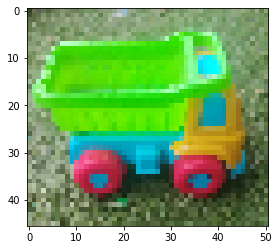

In [29]:
fig=plt.figure()

#timg=img[100:175,100:250]
#timg=img[100:175:2,100:250:2]
timg=img[::8,::8,:]
plt.imshow(timg)

In [30]:
Nx, Ny, Nrgb = np.shape(timg)
N_data = 100
rand_now = module.random_generator(N_data, Nx, Ny)
dRGB, g=rand_now.make_colordata(timg,20) 
g=np.array(g)

In [31]:
rgbvec=colorvector.generate_palette(8)

In [32]:
Npal=np.shape(rgbvec)[0]
print(Npal)

100


In [33]:
I_init=np.ones((Nx,Ny,Npal))
gall=np.einsum("ijk,cl->ijkcl",g,rgbvec)
 #ijkcl


In [34]:
print(np.shape(g),np.shape(dRGB),np.shape(rgbvec),np.shape(gall),np.shape(I_init)) #(i, j, k), (i, l), (c, l),(ijkcl),(jkc)

(100, 46, 51) (100, 3) (100, 3) (100, 46, 51, 100, 3) (46, 51, 100)


In [35]:
yR = mfista_func(I_init, dRGB, gall, lambda_gl= 1e2, print_func=True)


Current iteration: 0/10000,  L: 1067189.571634, cost: 111438077131.498306, cost_chiquare:1841372647.236722
Current iteration: 50/10000,  L: 881974.852590, cost: 263636.681057, cost_chiquare:191618.879257
Current iteration: 100/10000,  L: 801795.320536, cost: 72425.912627, cost_chiquare:15305.288515
Current iteration: 150/10000,  L: 881974.852590, cost: 57539.401176, cost_chiquare:2988.901302
Current iteration: 200/10000,  L: 881974.852590, cost: 53673.393068, cost_chiquare:1697.940167
Current iteration: 250/10000,  L: 881974.852590, cost: 49082.479752, cost_chiquare:459.672763
Current iteration: 300/10000,  L: 881974.852590, cost: 45001.627226, cost_chiquare:394.254723
Current iteration: 350/10000,  L: 881974.852590, cost: 40054.948127, cost_chiquare:171.446501
Current iteration: 400/10000,  L: 881974.852590, cost: 34547.785501, cost_chiquare:89.892693
Current iteration: 450/10000,  L: 881974.852590, cost: 28451.928195, cost_chiquare:96.212724
Current iteration: 500/10000,  L: 881974.8

In [36]:
np.shape(yR)

(46, 51, 100)

In [37]:
crit=1.e-2
mask=np.sum(yR[:,:,:],axis=(0,1))>crit
ysel=yR[:,:,mask]
print(np.shape(yR),np.shape(ysel))
#for i in range(0,np.shape(yR)[2]):
#    print(np.sum(yR[:,:,i]),np.std(yR[:,:,i]))

#y=np.array([yR.T,yG.T,yB.T]).T
#np.shape(y)

(46, 51, 100) (46, 51, 100)


In [38]:
ypredrgb=np.einsum("cl,jkc->jkl",rgbvec[mask,:],ysel)

In [39]:
np.shape(Ipred),np.shape(ypredrgb),np.shape(rgbvec[mask,:])

NameError: name 'Ipred' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


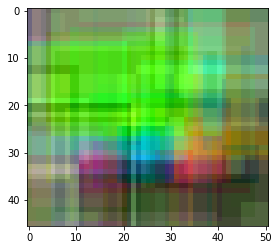

In [40]:
plt.imshow(ypredrgb)

In [41]:
np.shape(timg)

(46, 51, 3)

install colour package
pip install colour-science

In [42]:
import colour 
from colour.plotting import *
import itertools

In [43]:
#line = np.linspace(0.0, 1.0, 15, endpoint=True)
#rgb = np.array(list(itertools.product(line,line,line)), dtype=np.float)


In [44]:
np.shape(yi),np.shape(ti)
np.max(yi),np.max(ti)

(0.99652172859178312, 1.0)

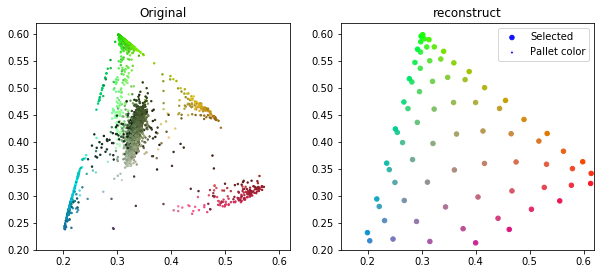

In [45]:
#XYZからxyへ変換
ti=timg.reshape(np.shape(timg)[0]*np.shape(timg)[1],3)
XYZ = colour.sRGB_to_XYZ(ti)
xy = colour.XYZ_to_xy(XYZ)

#CIE_1931_chromaticity_diagram_colours_plot(bounding_box=(-0.1, 0.9, -0.1, 0.9), standalone=False)
#plot_chromaticity_diagram_CIE1931(bounding_box=(0.15, 0.65, 0.15, 0.65), standalone=False)
#sRGB領域へプロット
#plt.plot(xy[:,0], xy[:,1], 'o', markersize=2, label="sRGB",color="gray",alpha=0.2)
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(121,aspect=1.0)
ax.scatter(xy[:,0], xy[:,1],facecolors=ti,alpha=1,s=2)
ax.set_xlim(0.15,0.62)
ax.set_ylim(0.2,0.62)
ax.set_title("Original")
#plt.legend() 

yi=rgbvec[mask,:]
XYZ = colour.sRGB_to_XYZ(yi)
xy = colour.XYZ_to_xy(XYZ)
yi[yi>1]=1.0
yi[yi<0]=0


yic=rgbvec[:,:]
XYZc = colour.sRGB_to_XYZ(yic)
xyc = colour.XYZ_to_xy(XYZc)
yic[yic>1]=1.0
yic[yic<0]=0

ax=fig.add_subplot(122,aspect=1.0)
ax.scatter(xy[:,0], xy[:,1],facecolors=yi,alpha=1,s=20,label="Selected")
ax.scatter(xyc[:,0], xyc[:,1],facecolors=yic,alpha=1,s=1,label="Pallet color")
plt.legend()
ax.set_xlim(0.15,0.62)
ax.set_ylim(0.2,0.62)
ax.set_title("reconstruct")
display(standalone=True)